In [1]:
import pandas as pd

In [7]:
stats = pd.read_csv('descriptive_stats.csv', index_col='repo')
stats['started_at'] = pd.to_datetime(stats['started_at'])
stats.head()

,started_at,commits,committers,issues,reporters,issue_comments,pull_requests,review_comments,events,labels
repo,,,,,,,,,,
davidmarkclements/0x,2016-02-22 15:39:58,440,23,108,51,585,87,83,823,8
1-liners/1-liners,2015-04-19 12:09:41,462,21,83,16,653,115,60,990,9
tjmehta/101,2014-04-11 08:14:10,318,21,65,20,563,91,57,663,9
chilts/12factor-config,2014-01-09 21:30:00,29,6,4,4,27,6,4,38,6
2gis/2gis-maps-react,2016-04-24 11:24:22,102,6,5,2,7,6,4,45,7


- most packages are small (<=115 commits, <=8 developers, <=13 issues, <= 8 reporters)
- most pull requests don't get any review comments (pr median is 16, review commits - 2)
- most projects use default issue labels only
- max number of issue comments and events is suspiciously round - will need to mine them separately.

In [28]:
stats.describe().astype(int)

,commits,committers,issues,reporters,issue_comments,pull_requests,review_comments,events,labels
count,34042,34042,34042,34042,34042,34042,34042,34042,34042
mean,342,16,74,41,344,59,53,614,8
std,2253,44,391,207,1694,247,508,2499,6
min,1,1,0,0,0,0,0,0,0
25%,57,5,3,2,14,6,0,38,7
50%,115,8,13,8,54,16,2,115,7
75%,263,14,43,25,181,43,13,354,8
max,287978,2480,19738,13760,40000,13477,49056,40000,303


## Distribution of dates started
since projects are filtered by the number of commits, last couple years don't reflect the dynamis of overall number of packages on npm

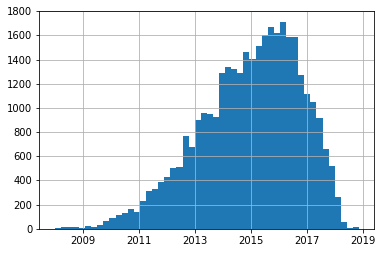

In [21]:
_ = stats.loc[stats['started_at'] > '2008', 'started_at'].hist(bins=50)

## Commits

- there is a range of commits/committers ratio
- most packages have few commits and few committers

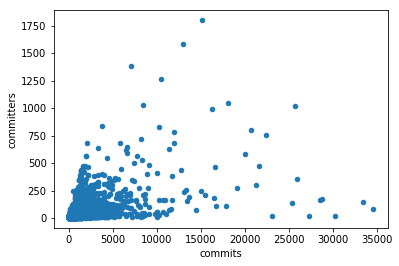

In [19]:
_ = stats.loc[stats['issues'] > 0].plot.scatter('commits', 'committers')

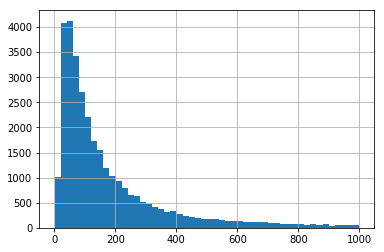

In [24]:
_ = stats.loc[stats['commits'] < 1000, 'commits'].hist(bins=50)

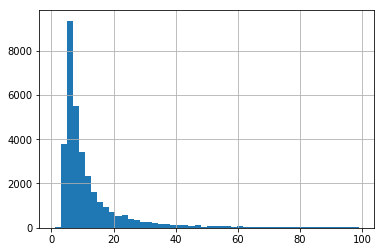

In [26]:
_ = stats.loc[stats['committers'] < 100, 'committers'].hist(bins=50)

In [31]:
# highest commits/commetters ratio is in commercial projects
stats.sort_values('commits', ascending=False).head(10)

,started_at,commits,committers,issues,reporters,issue_comments,pull_requests,review_comments,events,labels
repo,,,,,,,,,,
liferay/liferay-portal,2006-04-03 01:29:15,287978,491,0,0,11969,3229,5,13389,9
JetBrains/intellij-community,2004-11-05 17:15:51,233607,359,0,0,2580,916,443,4066,6
JetBrains/kotlin,2010-11-08 11:03:36,50294,278,0,0,3825,1981,2642,8260,9
qooxdoo/qooxdoo,NaT,34575,81,8991,73,36864,600,874,40000,177
rethinkdb/rethinkdb,2009-10-03 22:47:38,33429,148,33,28,182,26,5,277,8
stdlib-js/stdlib,2016-03-24 04:21:00,30273,14,170,20,481,76,1692,1933,54
AugurProject/augur,2014-12-06 05:44:11,28837,60,0,0,2,62,11,215,8
AnalyticalGraphicsInc/cesium,2012-03-02 22:28:20,28779,170,3086,520,30471,4168,14067,40000,37
camptocamp/cesium,2012-03-02 22:28:20,28591,167,1,1,99,57,20,381,7


## Issues

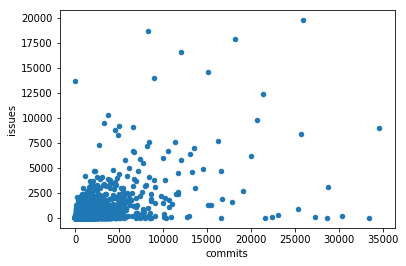

In [30]:
# some projects have issue trackers disabled, so filtering out those with zero issues
_ = stats.loc[stats['issues'] > 0].plot.scatter('commits', 'issues')

In [15]:
# font-awesome has weird release policy, hence the anomaly
stats.sort_values('issues', ascending=False).head(10)

,started_at,commits,committers,issues,reporters,issue_comments,pull_requests,review_comments,events,labels
repo,,,,,,,,,,
Microsoft/TypeScript,NaT,25883,352,19738,5983,40000,8668,24582,40000,92
npm/npm,2009-09-29 17:21:33,8340,526,18676,13760,40000,2138,1263,40000,65
twbs/bootstrap,2011-04-27 20:53:51,18137,1049,17897,10973,40000,9276,5858,40000,21
angular/angular,2014-09-18 16:12:01,12000,778,16552,7481,40000,10519,31148,40000,131
facebook/react-native,2015-01-30 01:10:49,15103,1798,14571,8025,40000,7606,11086,40000,140
ionic-team/ionic,2015-03-16 21:23:52,8980,275,13956,6579,40000,2384,791,40000,89
FortAwesome/Font-Awesome,2018-01-30 23:46:43,35,5,13688,10389,40000,534,51,40000,55
elastic/kibana,2013-05-22 09:12:09,21298,301,12399,3273,40000,13477,25619,40000,303
ElemeFE/element,2016-07-27 06:15:02,3798,396,10305,5300,28311,3152,1057,40000,73


## Issue events

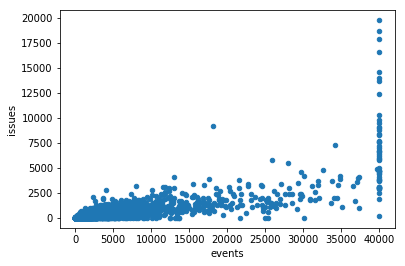

In [35]:
# there is definitely a hard cap of 40k events to be served via API
_ = stats.plot.scatter('events', 'issues')

## Issue comments

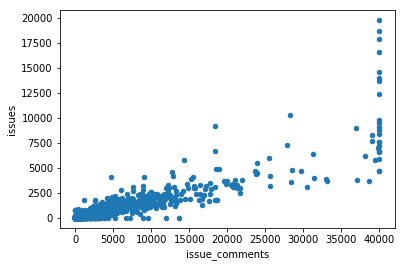

In [38]:
# same as for events, hard limit of 40K
_ = stats.plot.scatter('issue_comments', 'issues')

## Review comments

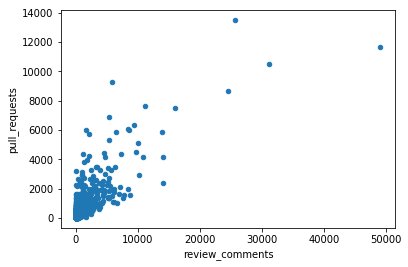

In [40]:
# there is kind of trendline + class of projects almost never using review comments
_ = stats.plot.scatter('review_comments', 'pull_requests')